# HR Analytics: Data-Driven Strategies for Employee Retention

## Description ## 
Salifort Motors' HR department aims to improve employee satisfaction and reduce attrition. They have collected employee data but need guidance on leveraging it effectively. This project focuses on analyzing employee data to identify key factors influencing attrition and building a predictive model to determine the likelihood of an employee leaving.  

By understanding employee turnover patterns, HR can implement targeted strategies to enhance retention, reduce hiring costs, and improve overall workplace satisfaction.  

### **Problem Statement:**  
The goal of this project is to analyze employee data and build a predictive model that determines the likelihood of an employee leaving the company. By identifying patterns and trends in attrition, HR can take data-driven actions to enhance employee satisfaction and retention.  


### **Column Description :** 

The dataset consists of various features that provide insights into employee satisfaction, performance, and workplace conditions. Below is a description of each variable:  

| **Colum**               | **Description** |
|----------------------------|------------------------------------------------------------|
| **satisfaction_level**      | Employee-reported job satisfaction level [0–1] |
| **last_evaluation**        | Score of employee's last performance review [0–1] |
| **number_project**         | Number of projects employee contributes to |
| **average_monthly_hours**  | Average number of hours employee worked per month |
| **time_spend_company**     | How long the employee has been with the company (years) |
| **Work_accident**          | Whether or not the employee experienced an accident while at work |
| **left**                   | Whether or not the employee left the company |
| **promotion_last_5years**  | Whether or not the employee was promoted in the last 5 years |
| **Department**             | The employee's department |
| **salary**                 | The employee's salary (U.S. dollars) |

These variables will be analyzed to understand employee attrition patterns and build a predictive model for identifying employees at risk of leaving the company.

### Import packages

In [1]:
#Data Manupilation
import numpy as np
import pandas as pd

#Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For displaying all the columns in dataframe
pd.set_option('display.max_columns', None)

#Modelling Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree



#Metrics and helful functions
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.metrics import roc_auc_score, roc_curve


### Load Dataset

In [8]:
#Load data into df0 dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")

#Display first 10 records
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Data Exploration and Data Cleaning

In [10]:
#Basic information on data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
#Descriptive statistics on data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [12]:
#Column header details
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [13]:
#Renaming column headers
''' Renaming is done to stnadardize the column names,
    correct the mispelled column names(Ex: average_montly_hours)
    and make column names consise as needed'''
df0 = df0.rename(columns= {'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

#Display columns
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [14]:
##Checking for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [15]:
#Check for duplicates
df0.duplicated().sum()

3008

In [16]:
#Print top5 duplicated values
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


Given the presence of several continuous variables across 10 columns, it is highly unlikely that these exact duplicate observations are legitimate. Therefore, they will be dropped from the dataset.


In [18]:
#Assigning dataset to df1 with duplicates removed
df1 = df0.drop_duplicates(keep = 'first')

#Display top 5 rows
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [19]:
#Display shape of the dataset
df1.shape

(11991, 10)

### Exploratory Data Analysis (EDA)

#### Check Outliers

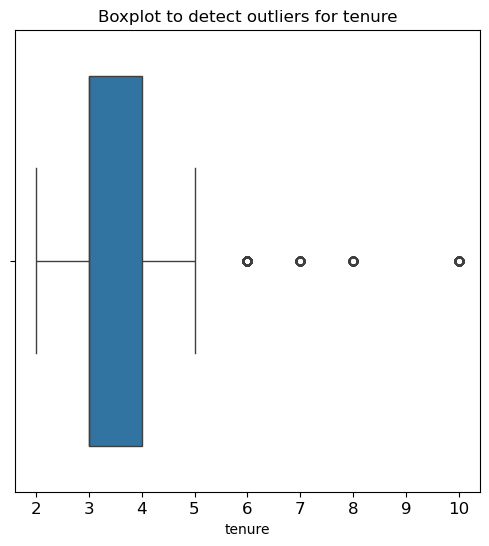

In [22]:
# Check for outliers in tenure
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize= 12)
plt.xticks(fontsize= 12)
plt.yticks(fontsize= 12)
sns.boxplot(data= df1, x= 'tenure')
plt.show()

In [23]:
#Check for outlier count

#Compute 25th percentile value in tenure
percentile25= df1['tenure'].quantile(0.25)

#Compute 75th percentile value in tenure
percentile75 = df1['tenure'].quantile(0.75)

#Compute interquartile range
IQR= percentile75-percentile25

#Upper and lower limit for non outlier values
upper_limit = percentile75 + (1.5*IQR)
lower_limit = percentile25 - (1.5*IQR)

print("Lower Limit: ", lower_limit)
print("Upper Limit: ", upper_limit)

outliers = df1[(df1['tenure']< lower_limit) | (df1['tenure']>upper_limit)]

print("Number of rows in data containing outliers in 'tenure': ", len(outliers))

Lower Limit:  1.5
Upper Limit:  5.5
Number of rows in data containing outliers in 'tenure':  824


In [24]:
#Number of people who left vs who stayed
print(df1['left'].value_counts())
print()

# % of people who left vs stayed
print(df1['left'].value_counts(normalize=True)*100)

left
0    10000
1     1991
Name: count, dtype: int64

left
0    83.39588
1    16.60412
Name: proportion, dtype: float64


#### Data Visualization

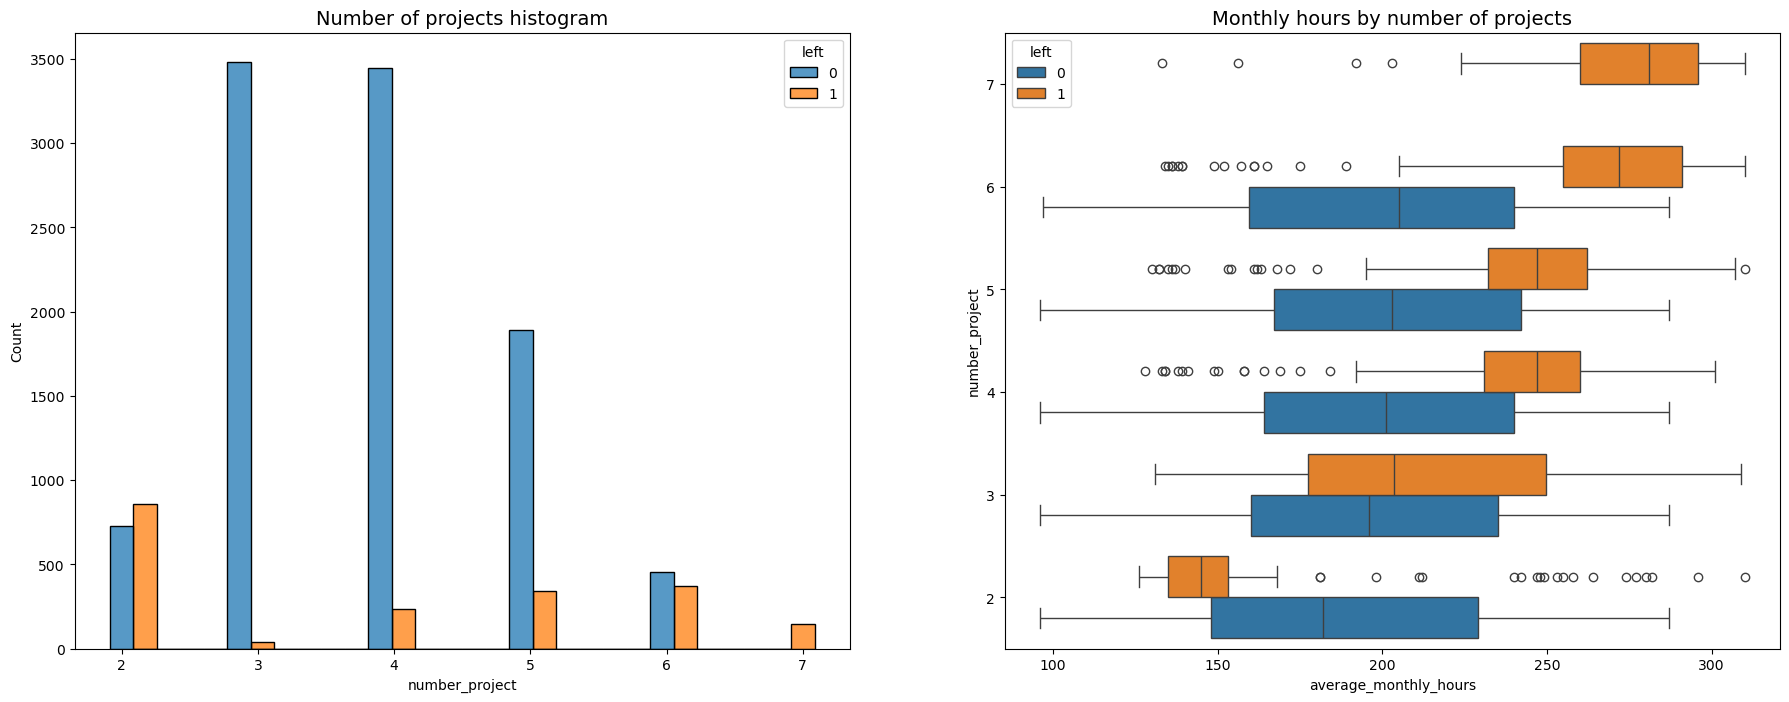

In [26]:
fig, ax = plt.subplots(1,2, figsize = (22,8))
# Histgram showing distribution of `number_project`, comparing employees who stayed versus those who left
stayed_employee = df1[df1['left']== 0]['number_project']
left_employee = df1[df1['left']== 1]['number_project']
sns.histplot(data=df1, x= 'number_project', hue= 'left', multiple='dodge', shrink=2, ax= ax[0])
ax[0].set_title('Number of projects histogram', fontsize='14')

#Boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data= df1, x= 'average_monthly_hours', y= 'number_project', hue= 'left', orient='h', ax=ax[1])
ax[1].invert_yaxis()
ax[1].set_title('Monthly hours by number of projects', fontsize='14')

#Display plot
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

In [28]:
#Check if all employees with 7 projects left the company
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

This confirms all the employees with 7 projects left the company

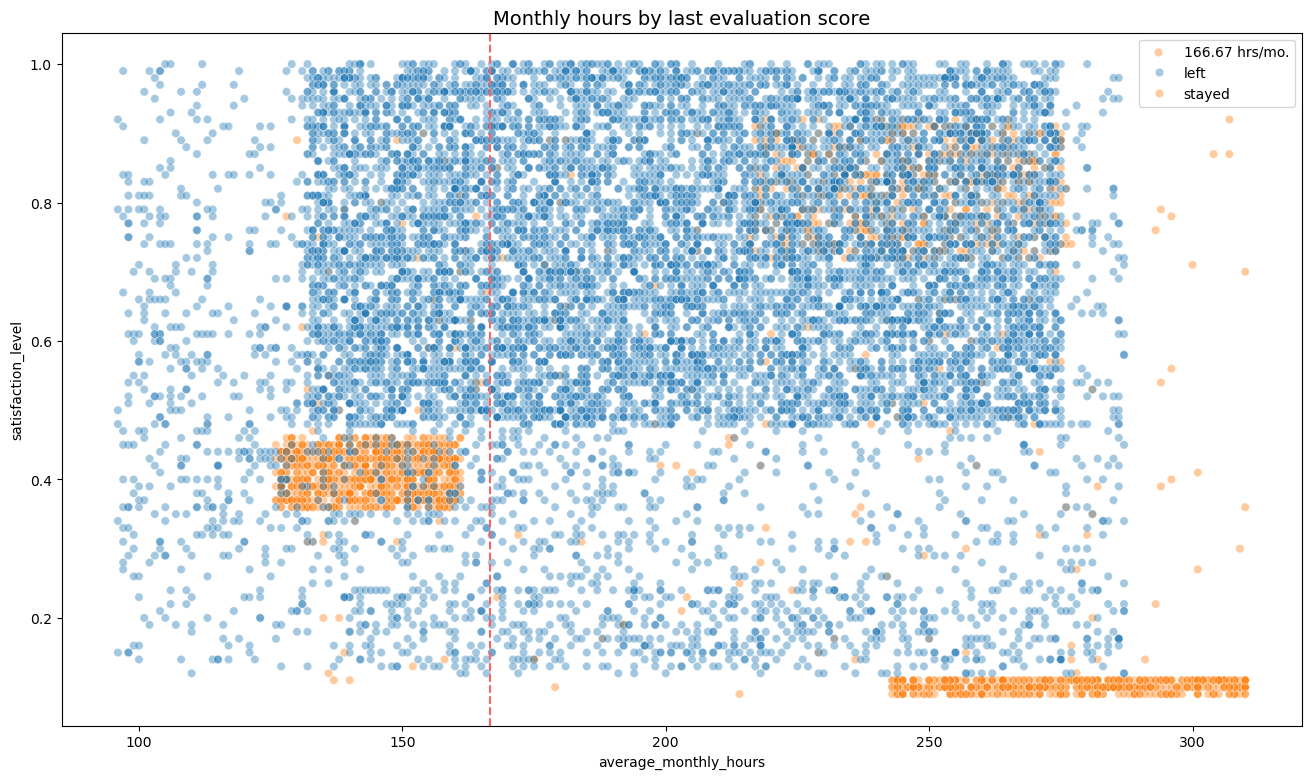

In [30]:
#Scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16,9))
sns.scatterplot(data = df1, x= 'average_monthly_hours', y= 'satisfaction_level',hue= 'left',alpha= 0.4)
plt.axvline(x= 166.67, color= '#ff6361', label= '166.67 hrs/mo.', ls= '--')
plt.legend(labels= ['166.67 hrs/mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data. 

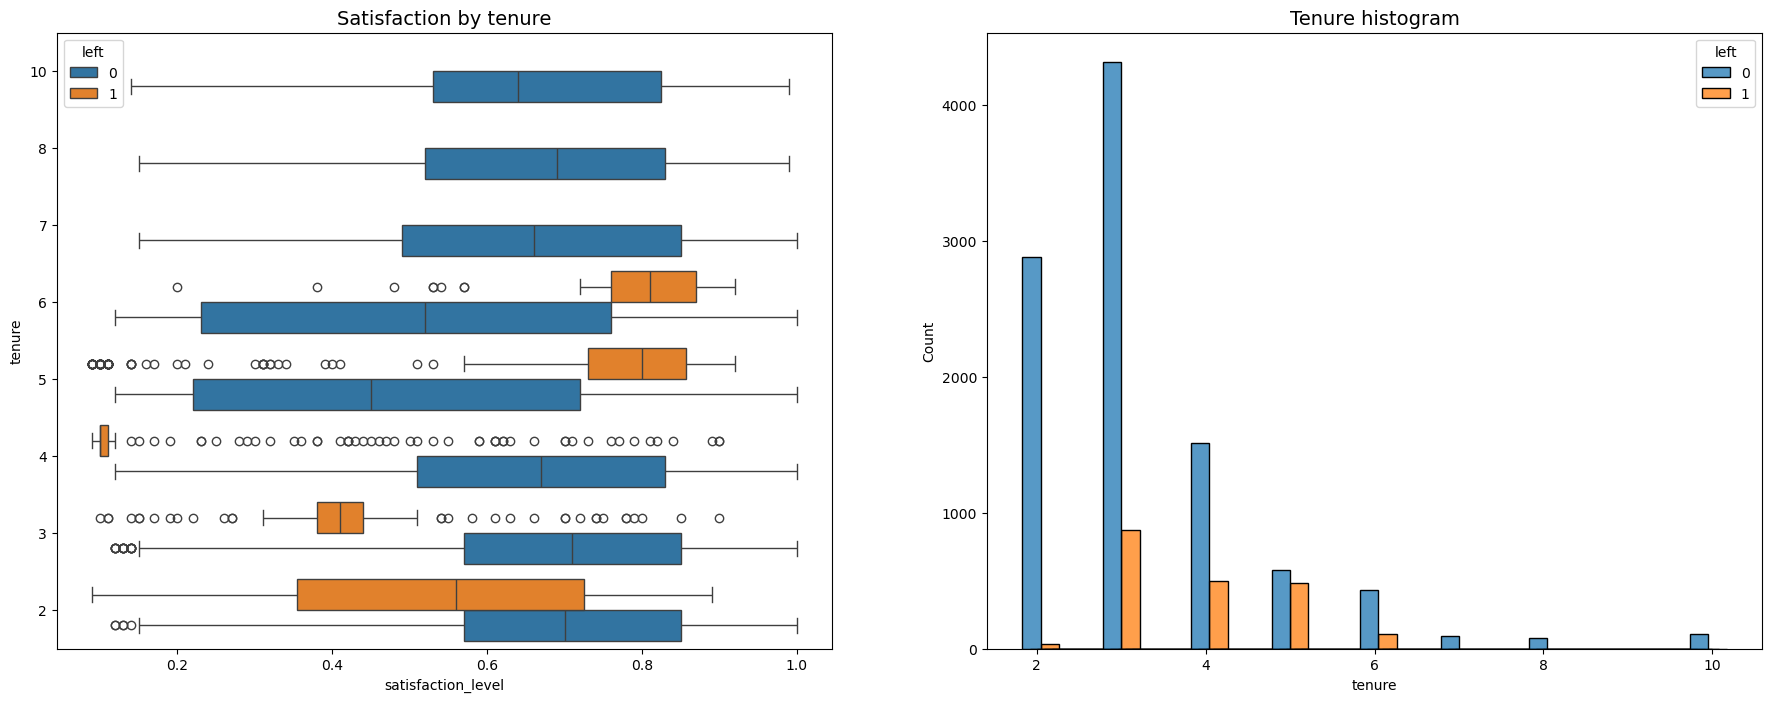

In [32]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

- Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
- Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible. 
- The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed. 
- The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.

In [34]:
df1.groupby(['left'])['satisfaction_level'].agg(["mean", "median"])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


We will consider 6 years or less as the short tenutre and 7 years or more as long tenure

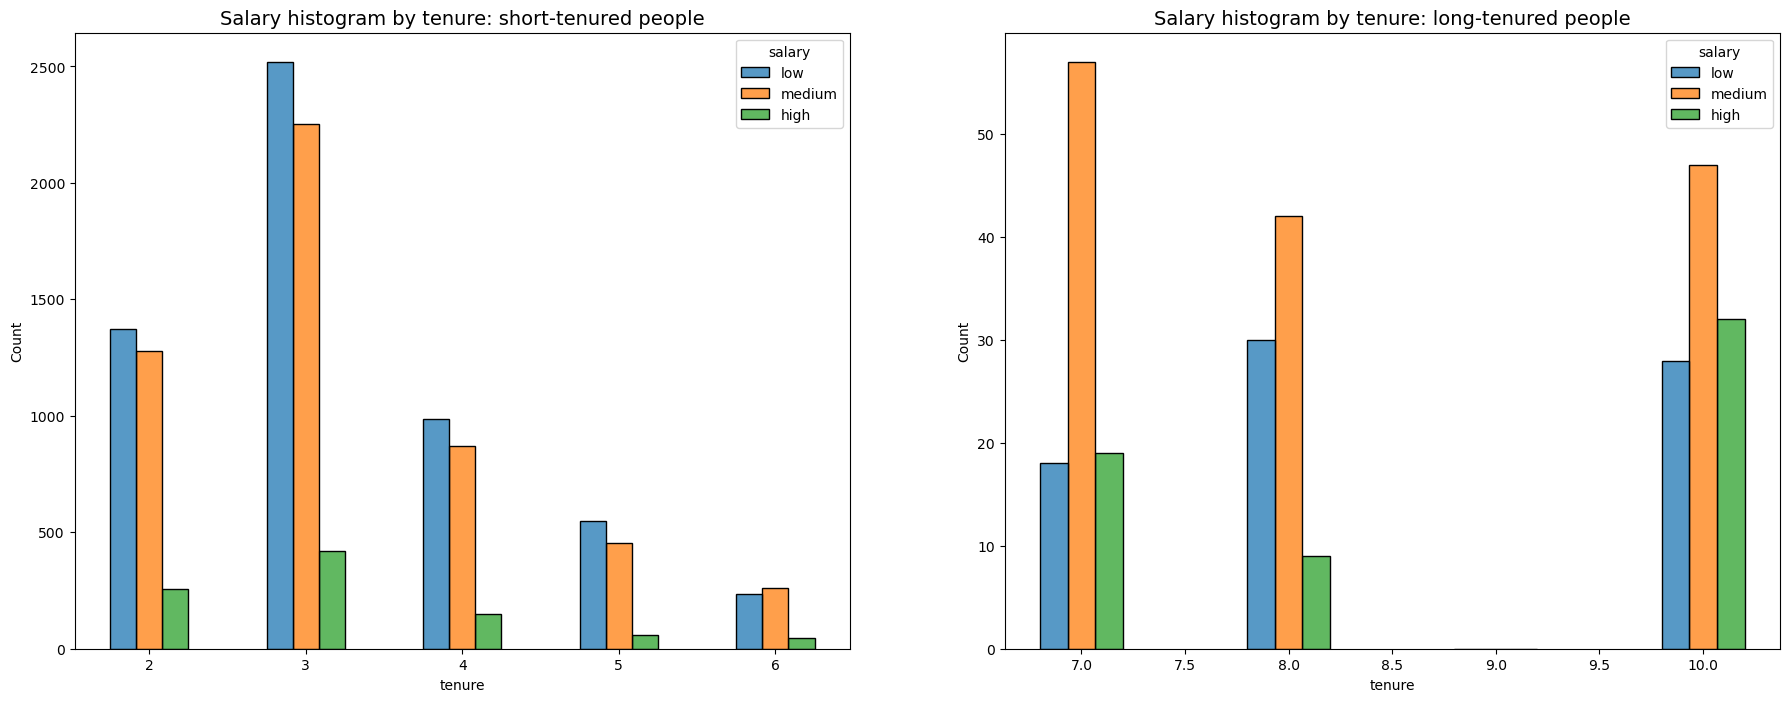

In [36]:
# Create a plot as needed 
### YOUR CODE HERE ###

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df1[df1['tenure'] <= 6]

# Define long-tenured employees
tenure_long = df1[df1['tenure'] >= 7]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14')
plt.show()

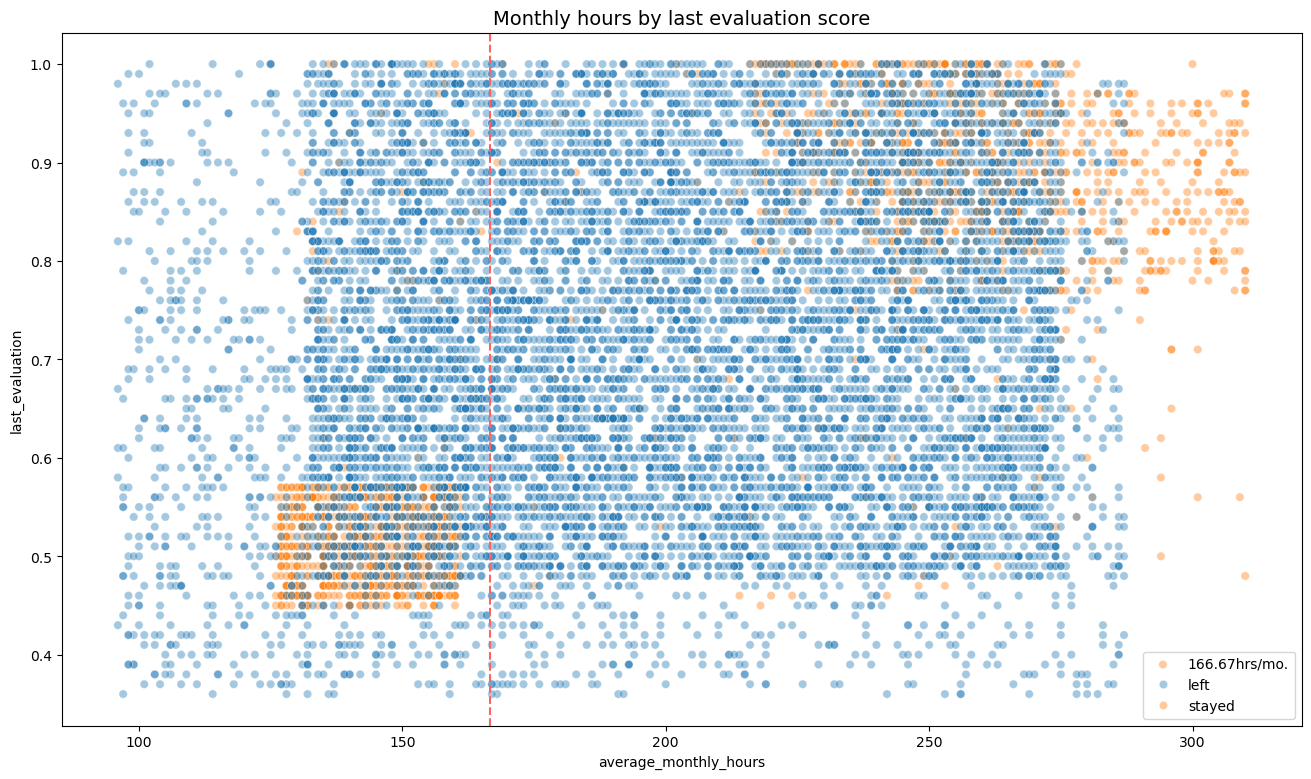

In [37]:
#Scatter Plot between 'average_monthly_hours' and 'last_evaluation'
plt.figure(figsize=(16,9))
sns.scatterplot(data= df1, x= 'average_monthly_hours', y= 'last_evaluation', hue='left', alpha= 0.4)
plt.axvline(x= 166.7, color= '#ff6361', label ='166.67 hrs./mo.', ls='--')
plt.legend(labels= ['166.67hrs/mo.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');
plt.show()

- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

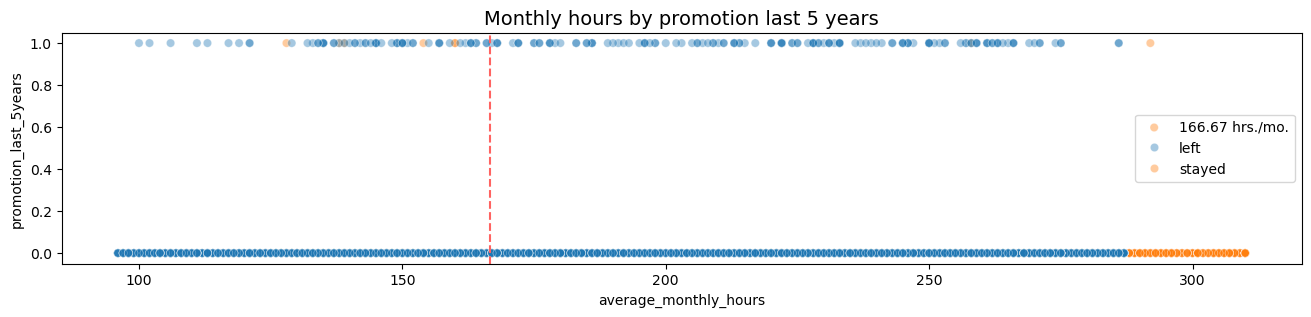

In [39]:
#Scatter Plot between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(16,3))
sns.scatterplot(data= df1, x= 'average_monthly_hours', y= 'promotion_last_5years',hue= 'left', alpha= 0.4)
plt.axvline(x= 166.67, color= '#ff6361', ls= '--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14');

- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

In [41]:
#Count of employees acreoss each department
df1["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

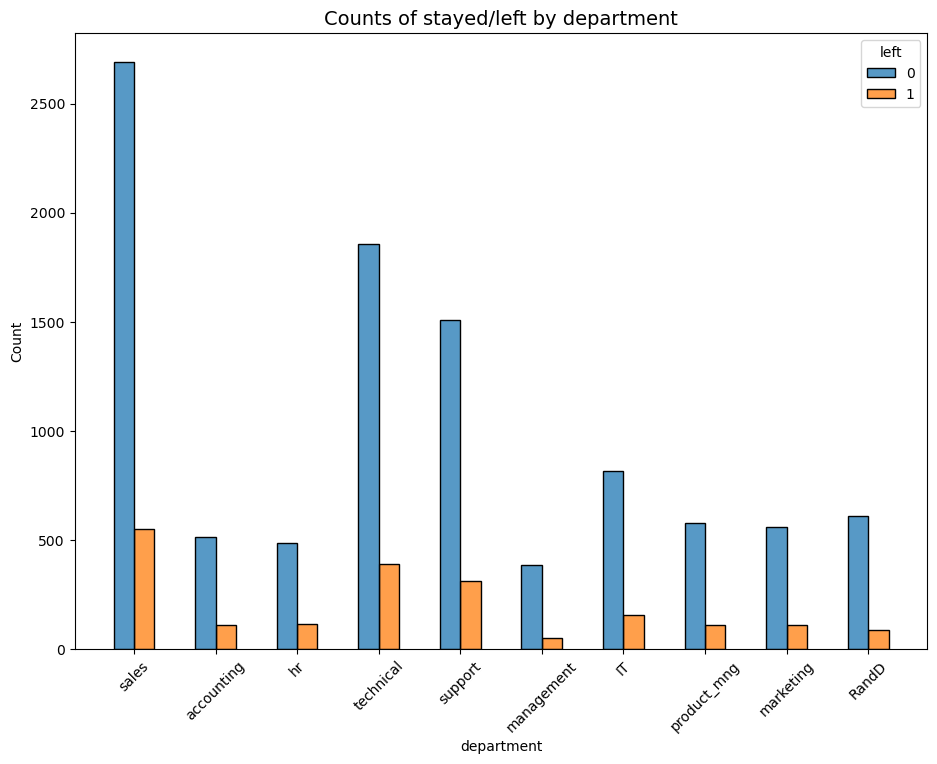

In [42]:
#Plot
plt.figure(figsize=(11,8))
sns.histplot(data= df1, x= 'department', hue= 'left', discrete=1,
            hue_order=[0,1],multiple= 'dodge', shrink=0.5)
plt.xticks(rotation = 45)
plt.title('Counts of stayed/left by department', fontsize=14);

There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 


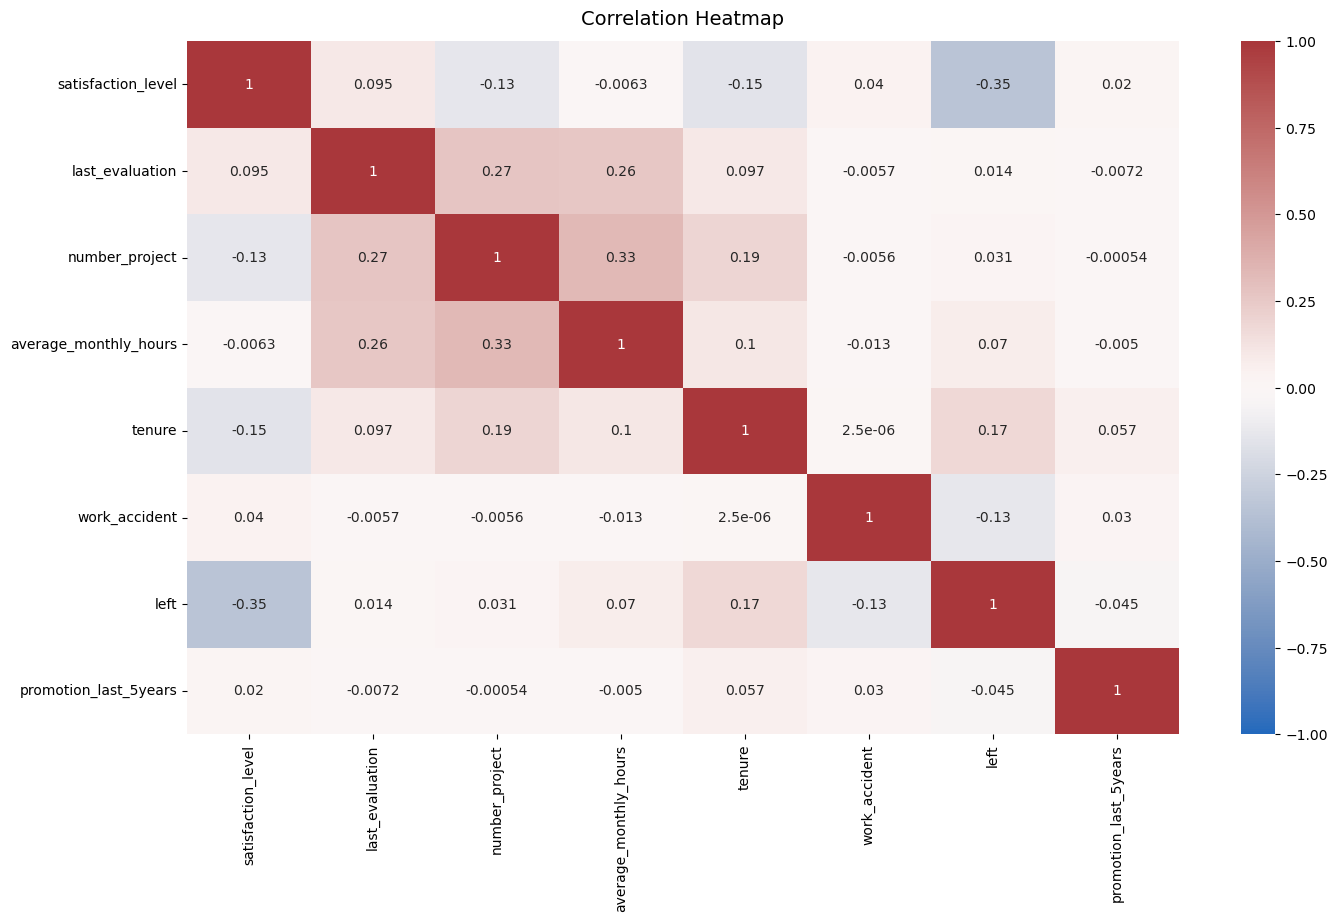

In [44]:
# Create a plot as needed 
### YOUR CODE HERE ###
df_heatmap = df1.select_dtypes(include=['number'])
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df_heatmap.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Model building

#### 1. Logistic Regression

Department and salary in the data are categorical data. Need to convert them into numeric

In [49]:
#Copy of the data
df_enc= df1.copy()

In [50]:
#Encoding Salary
df_enc['salary']= df_enc['salary'].astype('category').cat.set_categories(['low', 'medium', 'high']).cat.codes

#Encoding Department
df_enc = pd.get_dummies(df_enc, drop_first=False).astype('int')

In [51]:
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0,0,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0,0,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [52]:
#Remove ouliers for the logistic Regression
df_logreg = df_enc[(df_enc['tenure']>lower_limit) & (df_enc['tenure']<upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0,0,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [53]:
#Outcome variable
y= df_logreg['left']

y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int32

In [54]:
#Independent variables
X= df_logreg.drop('left', axis= 1)

X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0,0,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0,0,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [55]:
#Train and Test split
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.25, stratify=y, random_state=42)

In [56]:
log_clf= LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)

In [57]:
#Predict the target value
y_pred= log_clf.predict(X_test)

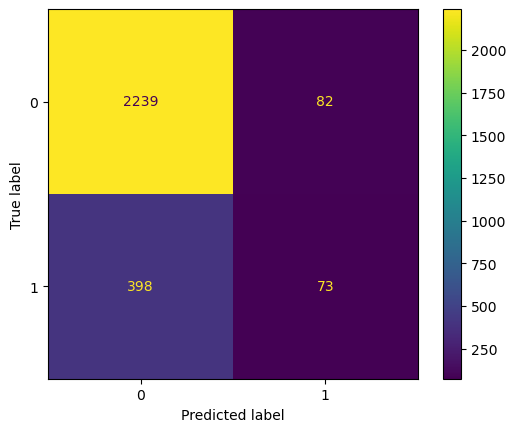

In [58]:
#Compute Confusion Matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

#Display Confusion Matix
log_disp= ConfusionMatrixDisplay(confusion_matrix= log_cm, display_labels=log_clf.classes_)

#Plot Confusion Matrix
log_disp.plot(values_format= '')

#Display plot
plt.show()

In [59]:
#Classification Report
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names= target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.85      0.96      0.90      2321
    Predicted would leave       0.47      0.15      0.23       471

                 accuracy                           0.83      2792
                macro avg       0.66      0.56      0.57      2792
             weighted avg       0.79      0.83      0.79      2792



#### 2. Decision Tree

In [116]:
y= df_enc['left']

In [118]:
X= df_enc.drop('left', axis=1)

In [120]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size= 0.25, stratify=y, random_state=0)

In [122]:
tree= DecisionTreeClassifier(random_state=0)

In [124]:
cv_params= {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
}
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}
tree1= GridSearchCV(tree, cv_params, scoring= scoring, cv= 4, refit= 'roc_auc')

In [126]:
%%time
tree1.fit(X_train,y_train)

CPU times: total: 7.23 s
Wall time: 8.29 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [128]:
tree1.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [130]:
tree1.best_score_

0.9554113699684115

In [150]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [152]:
tree1_cv_results= make_results('decision tree cv', tree1, 'auc')

In [154]:
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.829992,0.887457,0.856542,0.950628,0.955411


#### Random Forest

In [157]:
rf= RandomForestClassifier(random_state=0)

In [159]:
cv_params= {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500]
           }
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

rf1= GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [161]:
%%time
rf1.fit(X_train, y_train)

CPU times: total: 48min 30s
Wall time: 1h 35min 45s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [163]:
rf1.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [165]:
rf1.best_score_

0.9683229822272561

In [167]:
rf1_cv_results= make_results('random forest cv', rf1, 'auc')

In [169]:
rf1_cv_results

,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.879067,0.876081,0.877496,0.959413,0.968323


In [191]:
result_data = pd.concat([rf1_cv_results, tree1_cv_results], axis=0, ignore_index=True)

In [193]:
result_data

,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.879067,0.876081,0.877496,0.959413,0.968323
1,decision tree cv,0.829992,0.887457,0.856542,0.950628,0.955411


- If 'satisfaction_level' were recorded after an employee had already decided to leave, they could unfairly influence predictions- In a real-world deployment, the company might not have up-to-date satisfaction scores for all employees
- Departing employees may have lower satisfaction scores
These can lead to a bias in `satisfaction_level`. Hence we will be dropping this data
ns! 🚀


If employees reduce working hours before quitting, this can act as a direct signal rather than a meaningful predictor.
Hence rather than using `average_monthly_hours` directly we will convert it to binry data


In [206]:
df2 = df_enc.drop('satisfaction_level', axis=1)

In [208]:
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [210]:
#Adding a new column which is replica of average_monthly_hours
df2['overworked']= df2['average_monthly_hours']

In [212]:
df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,157
1,0,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,262
2,0,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,272
3,0,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,223
4,0,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,159


In [218]:
print("Minimum Monthly hour: ", df2['overworked'].min())
print("Maximum Monthly hour: ", df2['overworked'].max())

Minimum Monthly hour:  96
Maximum Monthly hour:  310


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.
We will consider those who worked above 175 hours as overworked

In [226]:
df2['overworked']= (df2['overworked']>175).astype(int)

df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [228]:
df2= df2.drop('average_monthly_hours', axis=1)

df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [230]:
y= df2['left']

X= df2.drop('left', axis=1)

In [232]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.25, stratify=y, random_state=0)

In [235]:
tree= DecisionTreeClassifier(random_state=0)

In [237]:
cv_params= {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
}
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}
tree2= GridSearchCV(tree, cv_params, scoring= scoring, cv= 4, refit= 'roc_auc')

In [239]:
%%time
tree2.fit(X_train, y_train)

CPU times: total: 8.52 s
Wall time: 8.94 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [241]:
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [243]:
tree2.best_score_

0.9481859199151268

In [245]:
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')

In [247]:
result_data = pd.concat([result_data,tree2_cv_results], axis=0, ignore_index=True)

In [249]:
result_data

,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.879067,0.876081,0.877496,0.959413,0.968323
1,decision tree cv,0.829992,0.887457,0.856542,0.950628,0.955411
2,decision tree2 cv,0.765033,0.834538,0.797744,0.929723,0.948186


In [252]:
rf= RandomForestClassifier(random_state=0)

In [254]:
cv_params= {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500]
           }
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

rf2= GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [256]:
%%time
rf2.fit(X_train,y_train)

CPU times: total: 36min 2s
Wall time: 37min 30s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall',
                      'roc_auc': 'roc_auc'})

In [258]:
rf2.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [260]:
rf2.best_score_

0.9565037337577

In [262]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.765033  0.834538  0.797744  0.929723  0.948186
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.805614  0.831875  0.818447   0.93873  0.956504


In [264]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [266]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.786765,0.859438,0.821497,0.937959,0.906519


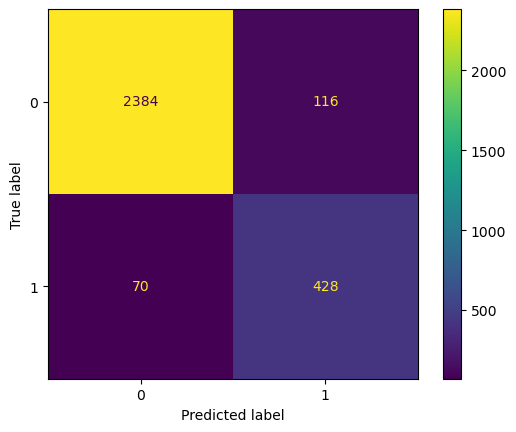

In [268]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

In [271]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
number_project,0.411630
tenure,0.388514
overworked,0.186992
work_accident,0.006655
salary,0.004315
department_sales,0.000692
last_evaluation,0.000562
department_support,0.000472
department_IT,0.000097
department_technical,0.000071


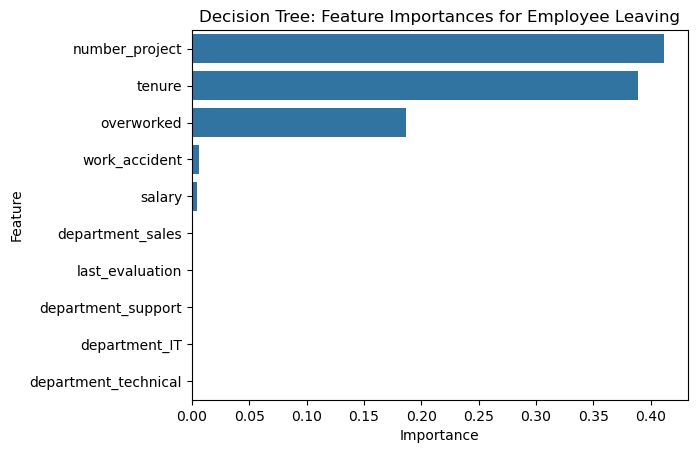

In [273]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

In [275]:
result_data= pd.concat([result_data, rf2_cv_results], axis=0, ignore_index=True)

In [277]:
result_data

,model,precision,recall,F1,accuracy,auc
0,random forest cv,0.879067,0.876081,0.877496,0.959413,0.968323
1,decision tree cv,0.829992,0.887457,0.856542,0.950628,0.955411
2,decision tree2 cv,0.765033,0.834538,0.797744,0.929723,0.948186
3,random forest2 cv,0.805614,0.831875,0.818447,0.938730,0.956504


Logistic Regression Model prediction had recall score of 83% and precision 79%. Based on above data we can see that Tree based models and Ensemble models outperformed the Regression.

##### After conducting feature engineering, random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked. 

To retain emplo:ers:Reduce
* Cap the number of projects that employees can w by planning and distrbuting projects accorddinglyork on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatsfied. 
* Either reward employees for working longer hours, or don't require them to do so. 
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear. 
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts. 
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort. 